In [2]:
import numpy as np
import matplotx
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from pyenergydiagrams import State, Diagram


class CustomDiagram(Diagram):
    def make_x_y_raw(self):
        x_raw, y_raw = [], []
        eps = 0.001
        for i, state in enumerate(self.states):
            x_raw += [i + j * eps for j in range(state.copies)]
            y_raw += [state.E] * state.copies
        return x_raw, y_raw

    def make_curve(self, nb_samples=2000):
        f = interp1d(self.x_raw, self.energies, kind="quadratic")

        x_new = np.linspace(min(self.x_raw), max(self.x_raw), nb_samples)
        y_smooth = f(x_new)
        return x_new, y_smooth

    def add_arrow(
        self,
        state1,
        state2,
        text="",
        loc_text="middle-right",
        kwargs_arrow={},
        kwargs_text={},
    ):
        # arrow
        plt.annotate(
            text="",
            xy=(self.states.index(state1), state1.E),
            xytext=(self.states.index(state1), state2.E),
            arrowprops=dict(
                arrowstyle="<|-|>", color="black", lw=0.5, shrinkA=0, shrinkB=0
            ),
            **kwargs_arrow
        )

        if loc_text == "middle-right":
            xytext = (self.states.index(state1) + 0.1, (state1.E + state2.E) / 2)
            ha = "left"
        elif loc_text == "middle-left":
            xytext = (self.states.index(state1) - 0.1, (state1.E + state2.E) / 2)
            ha = "right"
        elif loc_text == "top":
            xytext = (
                self.states.index(state1),
                (state1.E + state2.E) / 2 + abs(state1.E - state2.E) / 2 + 0.2,
            )
            ha = "center"
        elif loc_text == "bottom":
            xytext = (
                self.states.index(state1),
                (state1.E + state2.E) / 2 - abs(state1.E - state2.E) / 2 - 0.2,
            )
            ha = "center"

        # text
        plt.annotate(text=text, xy=xytext, ha=ha, va="center", **kwargs_text)

    def add_line(self, state, dx_left=0, dx_right=0, linestyles="solid", **kwargs):
        index = self.states.index(state)
        plt.hlines(
            y=state.E,
            xmin=index - dx_left,
            xmax=index + dx_right,
            linestyles=linestyles,
            **kwargs
        )

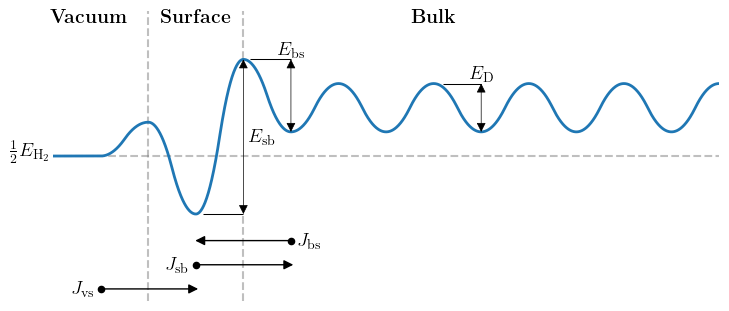

In [23]:
params = {
    "text.usetex": True,
    "font.size": 8,
    "font.family": "Times New Roman",
}
plt.rcParams.update(params)

mm2inch = 0.1 / 2.54
plt.figure(figsize=(190 * mm2inch, 85 * mm2inch))

energies = [-0.5, -0.5, 0.2, -1.7, 1.5, *[0, 1] * 5]

states = [State(E=E) for E in energies]

adsorption_site = states[3]
first_solution_site = states[5]

my_diagram = CustomDiagram(states)

with plt.style.context(matplotx.styles.dufte):
    plt.plot(my_diagram.x, my_diagram.y, color="tab:blue", lw=2)

    my_diagram.add_line(
        states[8], dx_left=-0.2, dx_right=1, linestyles="solid", color="black", lw=0.75
    )
    my_diagram.add_arrow(
        states[9],
        states[10],
        "$E_\mathrm{D}$",
        loc_text="top",
        kwargs_text={"color": "black"},
    )

    my_diagram.add_line(
        states[states.index(first_solution_site) - 1],
        dx_left=-0.15,
        dx_right=1,
        linestyles="solid",
        color="black",
        lw=0.75,
    )
    my_diagram.add_arrow(
        first_solution_site,
        states[states.index(first_solution_site) - 1],
        "$E_{\mathrm{bs}}$",
        loc_text="top",
        kwargs_text={"color": "black"},
    )

    my_diagram.add_line(
        adsorption_site,
        dx_left=-0.15,
        dx_right=1,
        linestyles="solid",
        color="black",
        lw=0.75,
    )
    my_diagram.add_arrow(
        states[states.index(first_solution_site) - 1],
        adsorption_site,
        "$E_{\mathrm{sb}}$",
        loc_text="middle-right",
        kwargs_text={"color": "black"},
    )

    plt.plot(
        [min(my_diagram.x), max(my_diagram.x)],
        [-0.5, -0.5],
        ls="dashed",
        color="grey",
        alpha=0.5,
        zorder=0,
        lw=1.5,
    )

    plt.plot(
        [states.index(adsorption_site) - 1, states.index(adsorption_site) - 1],
        [-3.5, 2.5],
        ls="dashed",
        color="grey",
        alpha=0.5,
        zorder=0,
        lw=1.5,
    )

    plt.plot(
        [states.index(first_solution_site) - 1, states.index(first_solution_site) - 1],
        [-3.5, energies[states.index(first_solution_site) - 2]],
        ls="dashed",
        color="grey",
        alpha=0.5,
        zorder=0,
        lw=1.5,
    )

    plt.plot(
        [states.index(first_solution_site) - 1, states.index(first_solution_site) - 1],
        [energies[states.index(first_solution_site) - 1], 2.5],
        ls="dashed",
        color="grey",
        alpha=0.5,
        zorder=0,
        lw=1.5,
    )

    font = {
        "color": "black",
    }
    kwargs = {"ha": "center"}
    plt.text(x=0.75, y=2.25, s=r"\bf{Vacuum}", fontdict=font, **kwargs)

    plt.text(x=3, y=2.25, s=r"\bf{Surface}", fontdict=font, **kwargs)

    plt.text(x=8, y=2.25, s=r"\bf{Bulk}", fontdict=font, **kwargs)

    plt.text(
        x=-0.5, y=-0.5, s=r"$\frac{1}{2} E_{\mathrm{H}_2}$", color="black", **kwargs
    )

    plt.scatter(x=1, y=-3.25, marker="o", s=20, color="black")
    plt.annotate(
        text="",
        xy=(3 + 0.05, -3.25),
        xytext=(1, -3.25),
        arrowprops=dict(arrowstyle="-|>", color="black", lw=1, shrinkA=0, shrinkB=0),
    )
    plt.annotate(
        text=r"$J_\mathrm{vs}$",
        xy=(1 - 0.35, -3.25),
        va="center",
        ha="center",
        color="black",
    )

    plt.scatter(x=3, y=-2.75, marker="o", s=20, color="black")
    plt.annotate(
        text="",
        xy=(5 + 0.05, -2.75),
        xytext=(3, -2.75),
        arrowprops=dict(arrowstyle="-|>", color="black", lw=1, shrinkA=0, shrinkB=0),
    )
    plt.annotate(
        text=r"$J_\mathrm{sb}$",
        xy=(3 - 0.37, -2.75),
        va="center",
        ha="center",
        color="black",
    )

    plt.scatter(x=5, y=-2.25, marker="o", s=20, color="black")
    plt.annotate(
        text="",
        xy=(3 - 0.07, -2.25),
        xytext=(5, -2.25),
        arrowprops=dict(arrowstyle="-|>", color="black", lw=1),
    )
    plt.annotate(
        text=r"$J_\mathrm{bs}$",
        xy=(5 + 0.4, -2.25),
        va="center",
        ha="center",
        color="black",
    )

    plt.ylim(-3.5, 2.5)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

    #plt.savefig("potential_diagram.pdf", dpi=1000, bbox_inches="tight", pad_inches=0.05)
    plt.show()
